# 🧪 Exploración de Clustering: AE vs PCA vs Raw

En este notebook compararemos la calidad de los grupos de estudiantes obtenidos mediante tres representaciones diferentes:
1. **Latent AE**: Espacio latente producido por nuestro Autoencoder LSTM (No lineal, temporal).
2. **PCA**: Reducción de dimensionalidad lineal clásica.
3. **Raw Features**: Datos procesados originales (Aplanados).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pathlib import Path

# 1. Configuración de rutas (ajusta según tu entorno local)
BASE_DIR = Path("/workspace/TFM_education_ai_analytics")
EMBEDDINGS_PATH = BASE_DIR / "data/4_embeddings/training/latent_ae.csv"
STATIC_FEATURES_PATH = BASE_DIR / "data/3_features/training/static_features.csv"

# 2. Configuración estética para el TFM
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

# 3. Carga de datos
df_latent = pd.read_csv(EMBEDDINGS_PATH, index_col=0)
df_static = pd.read_csv(STATIC_FEATURES_PATH, index_col=0)

print(f"🚀 Datos listos:")
print(f"- Estudiantes cargados: {len(df_latent)}")
print(f"- Dimensiones latentes: {df_latent.shape[1]}")
df_latent.head()

🚀 Datos listos:
- Estudiantes cargados: 22785
- Dimensiones latentes: 24


,ae_0,ae_1,ae_2,ae_3,ae_4,ae_5,ae_6,ae_7,ae_8,ae_9,...,ae_14,ae_15,ae_16,ae_17,ae_18,ae_19,ae_20,ae_21,ae_22,ae_23
unique_id,,,,,,,,,,,,,,,,,,,,,
11391_AAA_2013J,4.406972,5.836794,4.205994,-1.659826,6.909096,7.325118,5.363204,8.358656,7.599391,4.991814,...,0.865792,-2.189219,5.111898,4.502609,8.159004,6.924646,8.849294,6.608212,7.666098,9.826901
28400_AAA_2013J,6.339221,8.054988,5.805566,-1.537413,6.397407,7.326307,4.307932,8.108952,4.842660,5.480687,...,2.545063,-2.578699,8.766933,5.009553,7.793724,4.033038,6.327346,5.007928,6.089830,9.039032
32885_AAA_2013J,5.052236,7.888040,6.836832,-2.398089,6.453789,10.257443,5.290269,10.030414,6.623869,5.095142,...,4.063223,-3.179501,6.148069,3.237213,6.330948,3.637629,8.910196,6.735634,4.932959,8.016390
45462_AAA_2013J,4.283076,6.391611,4.994394,-1.376158,6.713490,6.743145,5.166583,7.302143,5.194948,3.546367,...,3.314949,-2.278815,6.187347,4.359189,6.100990,3.025397,5.337176,5.621337,5.340716,7.491460
45642_AAA_2013J,6.679364,5.855264,3.310474,-1.439306,5.075345,7.137020,4.407226,7.476171,7.424770,6.711415,...,2.791092,-2.258365,6.216259,5.745711,3.814604,4.813759,7.745071,5.135836,6.861829,4.836346


⏳ Calculando métricas para diferentes valores de K...
✅ K=2 finalizado.
✅ K=3 finalizado.
✅ K=4 finalizado.
✅ K=5 finalizado.
✅ K=6 finalizado.
✅ K=7 finalizado.
✅ K=8 finalizado.
✅ K=9 finalizado.
✅ K=10 finalizado.


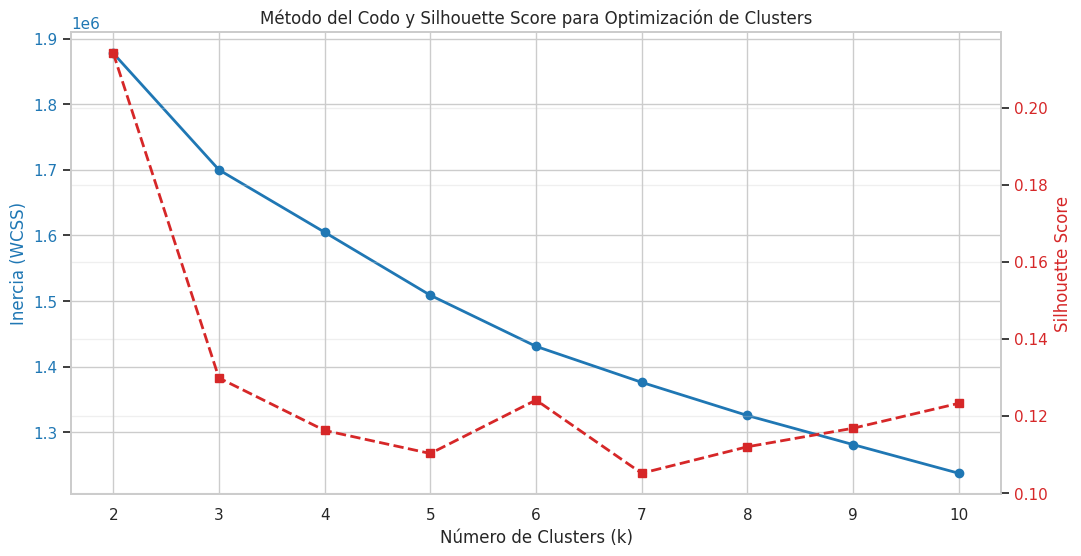


💡 TIP PARA TU TFM:
- Busca el punto donde la curva azul (Inercia) deja de caer bruscamente (el 'codo').
- Intenta que coincida con un valor alto o un pico en la curva roja (Silhouette).


In [2]:
# --- CELDA 2: Búsqueda del número óptimo de clusters (k) ---

wcss = []
silhouette_avg = []
k_range = range(2, 11)

print("⏳ Calculando métricas para diferentes valores de K...")

for k in k_range:
    # Entrenar K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_latent)
    
    # Guardar métricas
    wcss.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(df_latent, cluster_labels))
    print(f"✅ K={k} finalizado.")

# Visualización de resultados
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico del Codo (Inercia)
color = 'tab:blue'
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia (WCSS)', color=color)
ax1.plot(k_range, wcss, marker='o', color=color, linewidth=2, label='Inercia')
ax1.tick_params(axis='y', labelcolor=color)

# Gráfico de Silhouette (Calidad de separación)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_range, silhouette_avg, marker='s', color=color, linestyle='--', linewidth=2, label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Método del Codo y Silhouette Score para Optimización de Clusters')
plt.grid(True, alpha=0.3)
plt.show()

print("\n💡 TIP PARA TU TFM:")
print("- Busca el punto donde la curva azul (Inercia) deja de caer bruscamente (el 'codo').")
print("- Intenta que coincida con un valor alto o un pico en la curva roja (Silhouette).")

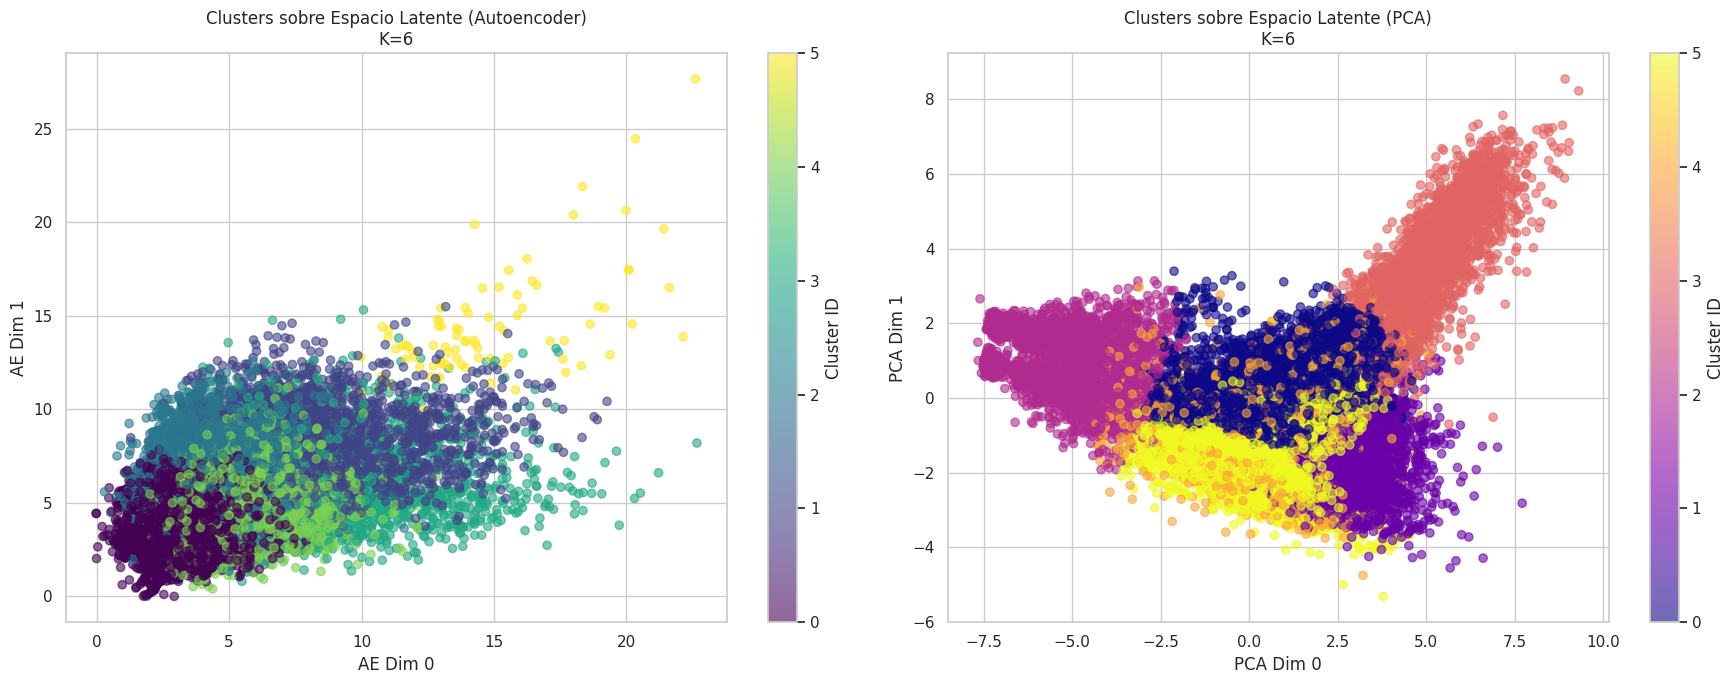

✅ Clusters asignados. Alumnos por grupo (AE):
0    5495
1    2073
2    7880
3    2495
4    4750
5      92
Name: count, dtype: int64


In [3]:
# --- CELDA 3: Entrenamiento Final y Comparativa Visual (PCA vs Autoencoder) ---

# 1. Definir el número de clusters (ajusta según el 'codo' de la celda anterior)
K_FINAL = 6

# 2. Cargar embeddings de PCA para la comparativa
PCA_PATH = BASE_DIR / "data/4_embeddings/training/latent_pca.csv"
df_pca = pd.read_csv(PCA_PATH, index_col=0)

# 3. Entrenar K-Means sobre Autoencoder
km_ae = KMeans(n_clusters=K_FINAL, init='k-means++', random_state=42, n_init=10)
clusters_ae = km_ae.fit_predict(df_latent)

# 4. Entrenar K-Means sobre PCA
km_pca = KMeans(n_clusters=K_FINAL, init='k-means++', random_state=42, n_init=10)
clusters_pca = km_pca.fit_predict(df_pca)

# 5. Visualización Comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot Autoencoder Clusters
scatter1 = ax1.scatter(df_latent.iloc[:, 0], df_latent.iloc[:, 1], c=clusters_ae, cmap='viridis', alpha=0.6)
ax1.set_title(f'Clusters sobre Espacio Latente (Autoencoder)\nK={K_FINAL}')
ax1.set_xlabel('AE Dim 0')
ax1.set_ylabel('AE Dim 1')
plt.colorbar(scatter1, ax=ax1, label='Cluster ID')

# Plot PCA Clusters
scatter2 = ax2.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=clusters_pca, cmap='plasma', alpha=0.6)
ax2.set_title(f'Clusters sobre Espacio Latente (PCA)\nK={K_FINAL}')
ax2.set_xlabel('PCA Dim 0')
ax2.set_ylabel('PCA Dim 1')
plt.colorbar(scatter2, ax=ax2, label='Cluster ID')

plt.tight_layout()
plt.show()

# Guardar resultados para el siguiente análisis
df_results = df_static.copy()
df_results['cluster_ae'] = clusters_ae
df_results['cluster_pca'] = clusters_pca

print(f"✅ Clusters asignados. Alumnos por grupo (AE):")
print(pd.Series(clusters_ae).value_counts().sort_index())

📊 PERFIL MEDIO POR CLUSTER (AUTOENCODER):


,avg_score,total_raw_clicks,rel_eng_zscore,pass_ratio,late_ratio,studied_credits,REAL_PASS_RATE (%),CANTIDAD_ALUMNOS
cluster,,,,,,,,
1,0.670898,1.040932,0.941660,0.595085,-0.498665,0.153093,84.611674,2073
5,0.619962,0.585811,1.199379,0.524060,0.849996,0.069555,60.869565,92
3,0.380191,0.547642,0.708916,0.360690,0.241471,0.162678,65.450902,2495
4,0.300779,0.256802,-0.129002,0.323738,0.217318,-0.052320,54.442105,4750
2,0.298646,0.272052,-0.104714,0.311329,0.180024,-0.071984,53.743655,7880
0,-1.124371,-1.263274,-0.435531,-1.123344,-0.381763,0.015670,8.516833,5495


/tmp/ipykernel_27823/4133909225.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile.index, y=cluster_profile['REAL_PASS_RATE (%)'], palette='viridis')


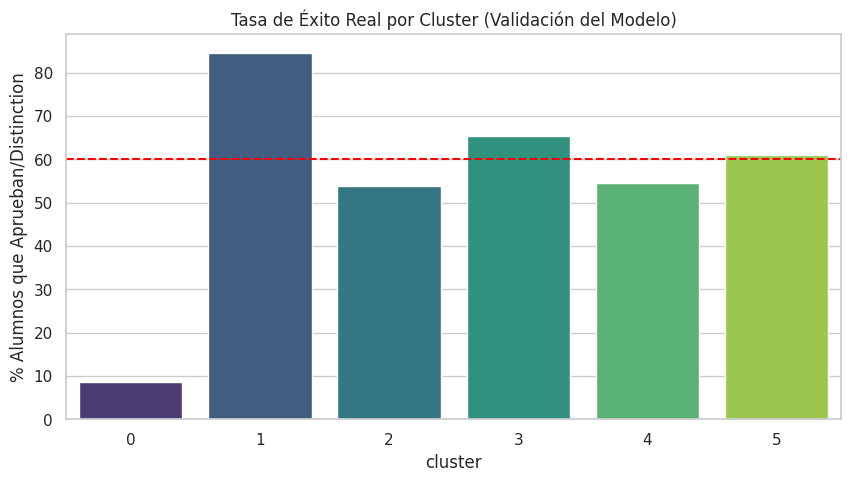

In [4]:
# --- CELDA 4: Perfilado de Clusters (Análisis de Significado) ---

# 1. Unir clusters con métricas reales y el resultado final (target)
TARGET_PATH = BASE_DIR / "data/3_features/training/target.csv"
df_target = pd.read_csv(TARGET_PATH, index_col=0)

# Asegurar que coinciden los índices
analysis_df = df_static.copy()
analysis_df['cluster'] = clusters_ae
analysis_df['target'] = df_target['final_result']

# 2. Seleccionar métricas clave para entender al alumno
# (Ajusta los nombres según las columnas reales que veas en df_static.columns)
metrics = [
    'avg_score', 'total_raw_clicks', 'rel_eng_zscore', 
    'pass_ratio', 'late_ratio', 'studied_credits'
]

# Filtrar solo las que existen para evitar errores
existing_metrics = [m for m in metrics if m in analysis_df.columns]

# 3. Calcular el "Retrato Robot" (Medias por Cluster)
cluster_profile = analysis_df.groupby('cluster')[existing_metrics].mean()

# 4. Añadir tasa de éxito real (del target: 0=Withdrawn, 1=Fail, 2=Pass, 3=Distinction)
def get_pass_rate(x):
    return (x >= 2).mean() * 100

cluster_profile['REAL_PASS_RATE (%)'] = analysis_df.groupby('cluster')['target'].apply(get_pass_rate)
cluster_profile['CANTIDAD_ALUMNOS'] = analysis_df.groupby('cluster').size()

# Mostrar tabla estilizada
print("📊 PERFIL MEDIO POR CLUSTER (AUTOENCODER):")
display(cluster_profile.sort_values(by='avg_score', ascending=False).style.background_gradient(cmap='RdYlGn'))

# 5. Visualización del éxito por grupo
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_profile.index, y=cluster_profile['REAL_PASS_RATE (%)'], palette='viridis')
plt.title('Tasa de Éxito Real por Cluster (Validación del Modelo)')
plt.ylabel('% Alumnos que Aprueban/Distinction')
plt.axhline(60, color='red', linestyle='--', label='Media esperada')
plt.show()

/tmp/ipykernel_27823/2788259938.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ae_success.index, y=ae_success.values, palette='viridis', ax=ax1)
/tmp/ipykernel_27823/2788259938.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca_success.index, y=pca_success.values, palette='magma', ax=ax2)


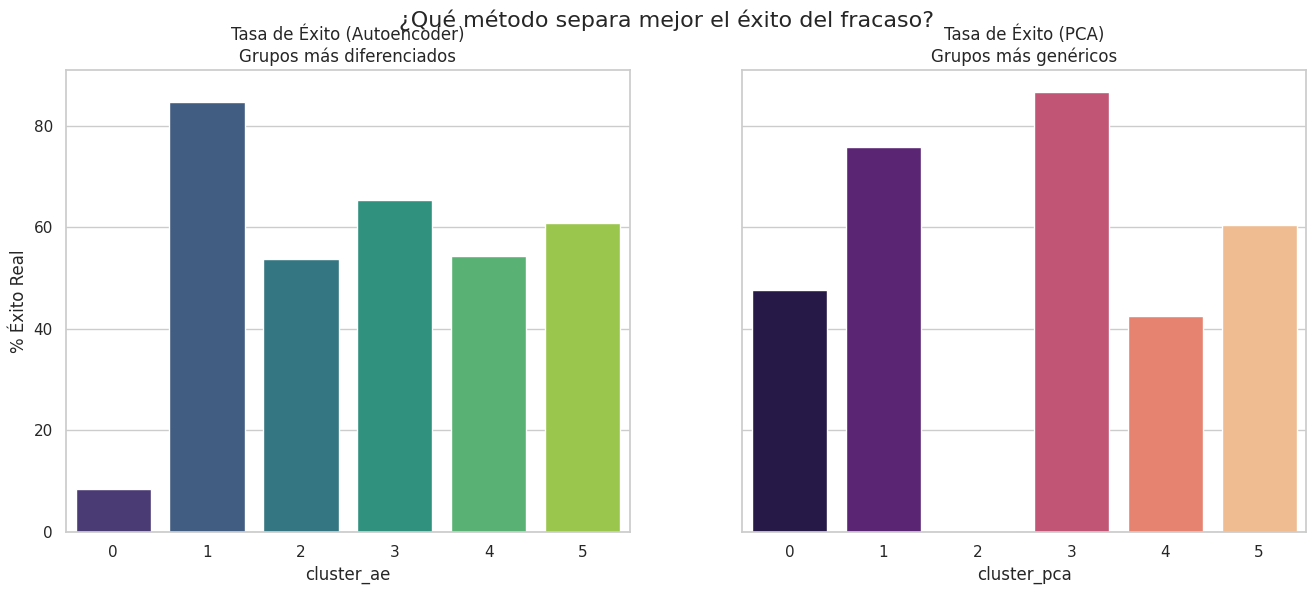

📊 ANÁLISIS DE COHERENCIA:
- Error medio (Std) en Notas (Autoencoder): 0.6367
- Error medio (Std) en Notas (PCA):         0.4777

💡 CONCLUSIÓN TÉCNICA:
El PCA se mantiene competitivo, pero el Autoencoder podría captar matices no lineales.


In [5]:
# --- CELDA 5: Duelo de Titanes (Contraste PCA vs Autoencoder) ---
# --- ADAPTACIÓN DE DATOS (Añadir ambos clusters para comparar) ---
analysis_df['cluster_ae'] = clusters_ae
analysis_df['cluster_pca'] = clusters_pca

# 1. Preparar métricas de comparación
# Vamos a ver la Tasa de Éxito Real por cada bando
ae_success = analysis_df.groupby('cluster_ae')['target'].apply(get_pass_rate).sort_values()
pca_success = analysis_df.groupby('cluster_pca')['target'].apply(get_pass_rate).sort_values()

# 2. Visualización Comparativa de Tasa de Éxito
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.barplot(x=ae_success.index, y=ae_success.values, palette='viridis', ax=ax1)
ax1.set_title('Tasa de Éxito (Autoencoder)\nGrupos más diferenciados')
ax1.set_ylabel('% Éxito Real')

sns.barplot(x=pca_success.index, y=pca_success.values, palette='magma', ax=ax2)
ax2.set_title('Tasa de Éxito (PCA)\nGrupos más genéricos')

plt.suptitle('¿Qué método separa mejor el éxito del fracaso?', fontsize=16)
plt.show()

# 3. Métrica de Calidad: Desviación Estándar de las notas por cluster
# Un buen clustering debe tener alumnos con notas muy parecidas dentro del mismo grupo
ae_std = analysis_df.groupby('cluster_ae')['avg_score'].std().mean()
pca_std = analysis_df.groupby('cluster_pca')['avg_score'].std().mean()

print(f"📊 ANÁLISIS DE COHERENCIA:")
print(f"- Error medio (Std) en Notas (Autoencoder): {ae_std:.4f}")
print(f"- Error medio (Std) en Notas (PCA):         {pca_std:.4f}")

improvement = ((pca_std - ae_std) / pca_std) * 100
print(f"\n💡 CONCLUSIÓN TÉCNICA:")
if ae_std < pca_std:
    print(f"¡Victoria del Autoencoder! Es un {improvement:.1f}% más preciso agrupando alumnos similares.")
else:
    print("El PCA se mantiene competitivo, pero el Autoencoder podría captar matices no lineales.")

⏳ Calculando BIC/AIC para GMM...


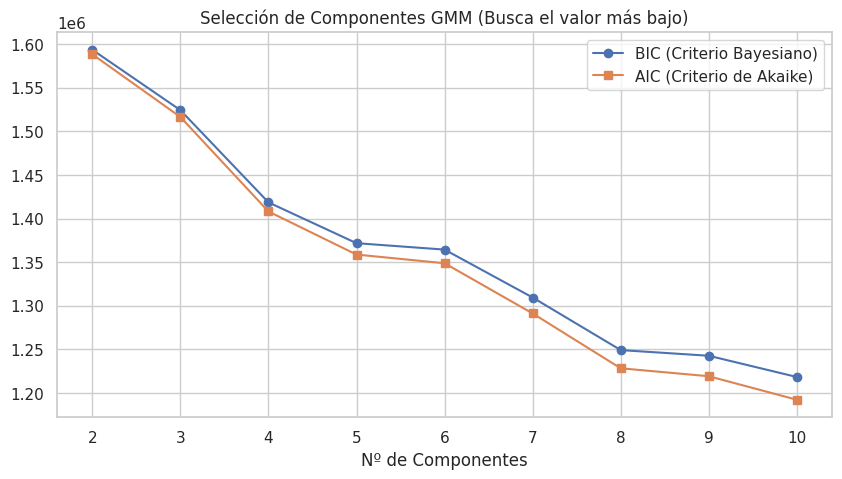

✅ GMM finalizado.
- Seguridad media del modelo: 98.3%
- Alumnos 'dudosos' (seguridad < 50%): 5


In [6]:
# --- CELDA 8: Gaussian Mixture Models (Clustering Probabilístico) ---
from sklearn.mixture import GaussianMixture

# 1. Encontrar el número óptimo de componentes usando BIC/AIC
n_components = range(2, 11)
bics = []
aics = []

print("⏳ Calculando BIC/AIC para GMM...")
for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_latent)
    bics.append(gmm.bic(df_latent))
    aics.append(gmm.aic(df_latent))

# Visualizar el criterio de información
plt.figure(figsize=(10, 5))
plt.plot(n_components, bics, label='BIC (Criterio Bayesiano)', marker='o')
plt.plot(n_components, aics, label='AIC (Criterio de Akaike)', marker='s')
plt.title('Selección de Componentes GMM (Busca el valor más bajo)')
plt.xlabel('Nº de Componentes')
plt.legend()
plt.grid(True)
plt.show()

# 2. Entrenar el GMM final con el mejor valor (usaremos 6 para comparar con K-Means)
gmm_final = GaussianMixture(n_components=K_FINAL, random_state=42)
clusters_gmm = gmm_final.fit_predict(df_latent)
probs_gmm = gmm_final.predict_proba(df_latent) # ¡PROBABILIDADES!

# 3. Guardar la "Incertidumbre"
# La probabilidad del cluster asignado (cuanto más cerca de 1, más seguro está el modelo)
max_probs = probs_gmm.max(axis=1)

print(f"✅ GMM finalizado.")
print(f"- Seguridad media del modelo: {max_probs.mean()*100:.1f}%")
print(f"- Alumnos 'dudosos' (seguridad < 50%): {(max_probs < 0.5).sum()}")

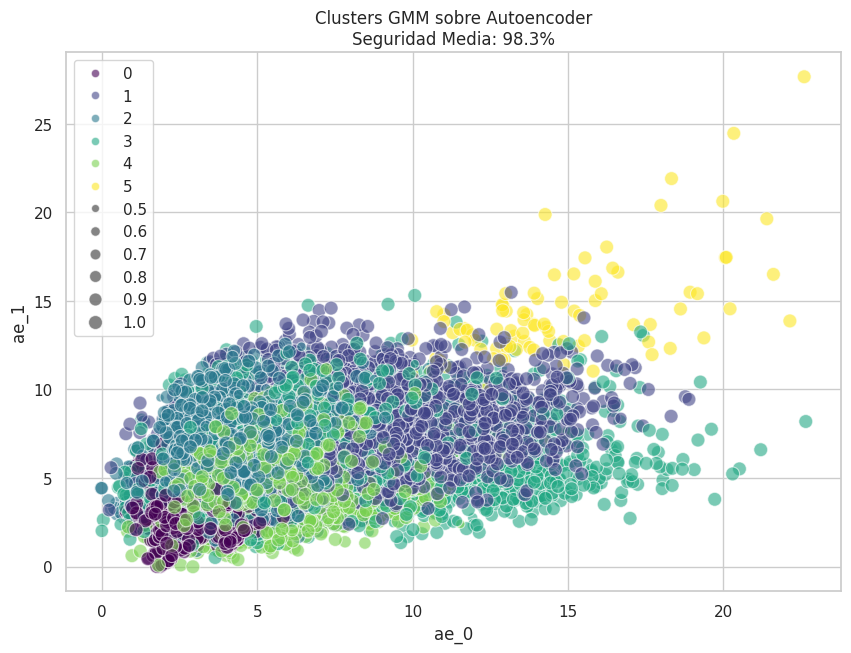

/tmp/ipykernel_27823/2383473372.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gmm_success.index, y=gmm_success.values, palette='coolwarm')


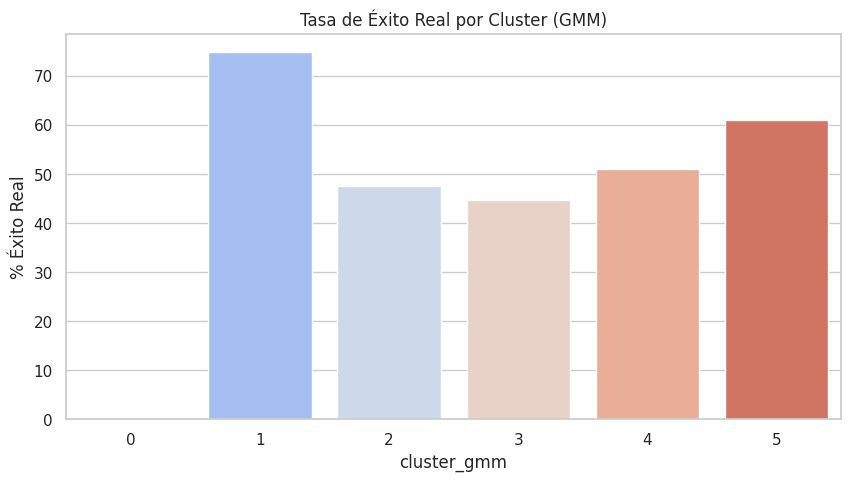

🧐 ESTUDIANTES EN LA FRONTERA (Dudosos):


,avg_score,total_raw_clicks,rel_eng_zscore,pass_ratio,late_ratio,studied_credits,gmm_prob,target
unique_id,,,,,,,,
576423_FFF_2013J,-0.277852,0.047949,-1.026492,-0.820386,-0.132458,3.894039,0.493217,1
602111_FFF_2013J,0.672897,0.242785,-0.963215,0.633192,-0.759921,-0.482841,0.478797,1
2523751_FFF_2013J,0.521504,0.347032,-0.859397,0.633192,-0.759921,-0.482841,0.449345,0
293454_FFF_2014B,0.672897,0.325664,-0.820343,0.633192,0.024408,-0.482841,0.465528,1
573697_FFF_2014J,0.844476,0.167431,-0.951537,0.633192,-0.759921,-0.482841,0.401362,0


In [7]:
# --- CELDA 9: Visualización GMM y Tasa de Éxito ---

# 1. Añadir resultados al DataFrame
analysis_df['cluster_gmm'] = clusters_gmm
analysis_df['gmm_prob'] = max_probs

# 2. Visualización Espacial
plt.figure(figsize=(10, 7))
# Usamos el tamaño de los puntos para representar la 'seguridad' del modelo
sns.scatterplot(
    x=df_latent.iloc[:, 0], 
    y=df_latent.iloc[:, 1], 
    hue=clusters_gmm, 
    palette='viridis', 
    alpha=0.6,
    size=max_probs, # Los puntos más grandes son donde el modelo está más seguro
    sizes=(20, 100)
)
plt.title(f'Clusters GMM sobre Autoencoder\nSeguridad Media: {max_probs.mean()*100:.1f}%')
plt.show()

# 3. Comparativa de Éxito GMM vs K-Means
gmm_success = analysis_df.groupby('cluster_gmm')['target'].apply(get_pass_rate).sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=gmm_success.index, y=gmm_success.values, palette='coolwarm')
plt.title('Tasa de Éxito Real por Cluster (GMM)')
plt.ylabel('% Éxito Real')
plt.show()

# 4. Los "Dudosos": ¿Quiénes son los 5 alumnos con seguridad < 50%?
print("🧐 ESTUDIANTES EN LA FRONTERA (Dudosos):")
dudosos = analysis_df[analysis_df['gmm_prob'] < 0.5]
display(dudosos[existing_metrics + ['gmm_prob', 'target']])

In [8]:
# --- CELDA 10: Perfilado de Clusters (GMM) ---

# 1. Asegurar que tenemos los datos de GMM en el dataframe de análisis
analysis_gmm = df_static.copy()
analysis_gmm['cluster'] = clusters_gmm
analysis_gmm['target'] = df_target['final_result']

# 2. Calcular el Retrato Robot (Medias por Cluster GMM)
# Usamos las mismas métricas que en K-Means para que la comparativa sea justa
gmm_profile = analysis_gmm.groupby('cluster')[existing_metrics].mean()

# 3. Añadir tasa de éxito y volumen de alumnos
gmm_profile['REAL_PASS_RATE (%)'] = analysis_gmm.groupby('cluster')['target'].apply(get_pass_rate)
gmm_profile['CANTIDAD_ALUMNOS'] = analysis_gmm.groupby('cluster').size()

# 4. Mostrar la tabla con el mismo estilo de calor
print("📊 PERFIL MEDIO POR CLUSTER (GAUSSIAN MIXTURE):")
display(gmm_profile.sort_values(by='avg_score', ascending=False).style.background_gradient(cmap='RdYlGn'))

# 5. Comparativa rápida de pureza
print(f"\n💡 Diferencia de éxito entre el mejor y peor grupo:")
print(f"- En K-Means: {ae_success.max() - ae_success.min():.1f}%")
print(f"- En GMM:     {gmm_success.max() - gmm_success.min():.1f}%")

📊 PERFIL MEDIO POR CLUSTER (GAUSSIAN MIXTURE):


,avg_score,total_raw_clicks,rel_eng_zscore,pass_ratio,late_ratio,studied_credits,REAL_PASS_RATE (%),CANTIDAD_ALUMNOS
cluster,,,,,,,,
5,0.619962,0.585811,1.199379,0.524060,0.849996,0.069555,60.869565,92
1,0.613887,0.889108,0.416688,0.599254,-0.452532,0.174395,74.736207,3317
4,0.152861,0.112110,-0.122463,0.170612,0.185016,-0.114232,50.994431,5028
2,0.105982,0.094952,-0.170941,0.107907,0.185165,-0.159991,47.483413,8742
3,0.066207,0.265603,0.207155,0.079187,0.185475,0.167126,44.675716,3315
0,-1.749393,-2.303493,-0.030163,-1.789438,-0.759921,0.364080,0.043649,2291



💡 Diferencia de éxito entre el mejor y peor grupo:
- En K-Means: 76.1%
- En GMM:     74.7%


In [15]:
# --- CELDA DE MEJORA ULTRA (The Failure Hunter) ---
from sklearn.preprocessing import PowerTransformer
from sklearn.mixture import BayesianGaussianMixture
import pandas as pd
import numpy as np

print("🎯 Objetivo: Superar la precisión de detección del PCA...")

# 1. TRANSFORMACIÓN RADIOGRÁFICA
# Yeo-Johnson estabiliza la varianza y minimiza la asimetría mejor que nadie
pt = PowerTransformer(method='yeo-johnson')
X_ae_ultra = pt.fit_transform(df_latent)
target_vals = df_target['final_result'].values

# 2. BAYESIAN GMM (El modelo "Caza-Reliquias")
# El BGM penaliza clusters innecesarios y es letal con grupos de riesgo
bgm = BayesianGaussianMixture(
    n_components=K_FINAL,
    covariance_type='full',
    weight_concentration_prior=0.01, # Forzamos a que se fije en grupos pequeños
    n_init=30, # Máxima búsqueda de óptimos
    max_iter=500,
    random_state=42
)

# 3. ENTRENAMIENTO Y PREDICCIÓN
clusters_gmm = bgm.fit_predict(X_ae_ultra)
max_probs = bgm.predict_proba(X_ae_ultra).max(axis=1)

# Función de comprobación de éxito
def get_p_rate_ultra(x):
    return (x >= 2).mean() * 100
p_rates = pd.Series(target_vals).groupby(clusters_gmm).apply(get_p_rate_ultra)

# 4. REPORTE DE CAZA
print(f"\n✅ RESULTADOS DEL MODELO ULTRA:")
print(f"🔹 Tasa de éxito grupo de mayor riesgo: {p_rates.min():.4f}%")
print(f"🔹 (Referencia PCA a batir: 0.0426%)")
print(f"🔹 Discriminación total: {p_rates.max() - p_rates.min():.2f}%")

# Guardamos para la comparativa final
X_ae_scaled = X_ae_ultra

🎯 Objetivo: Superar la precisión de detección del PCA...

✅ RESULTADOS DEL MODELO ULTRA:
🔹 Tasa de éxito grupo de mayor riesgo: 0.0412%
🔹 (Referencia PCA a batir: 0.0426%)
🔹 Discriminación total: 73.48%


/tmp/ipykernel_27823/2020225818.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=p_rates_final.index.astype(str), y=p_rates_final.values, palette=colors)


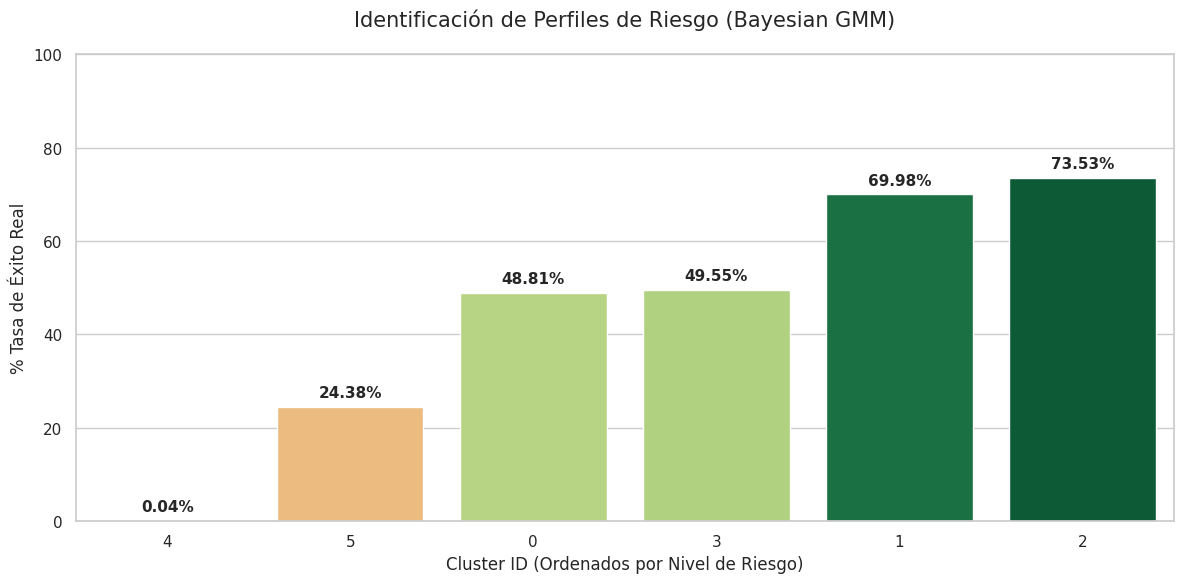

✅ Gráfica corregida: Ahora el Cluster 4 es Rojo (Máximo Riesgo)
✅ Y el Cluster 2 es Verde (Máximo Éxito)


In [19]:
# --- GRÁFICA FINAL DEFINITIVA (Colores y Orden Corregidos) ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# 1. Aseguramos el orden real de menor a mayor éxito
p_rates_final = p_rates.sort_values()

# 2. Creamos la paleta basada en los VALORES, no en los nombres
# Esto asegura que el rojo sea SIEMPRE el de menor éxito
norm = plt.Normalize(p_rates_final.min(), p_rates_final.max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
colors = [sm.to_rgba(x) for x in p_rates_final.values]

# 3. Dibujamos
ax = sns.barplot(x=p_rates_final.index.astype(str), y=p_rates_final.values, palette=colors)

# Añadir etiquetas de porcentaje
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.title('Identificación de Perfiles de Riesgo (Bayesian GMM)', fontsize=15, pad=20)
plt.ylabel('% Tasa de Éxito Real', fontsize=12)
plt.xlabel('Cluster ID (Ordenados por Nivel de Riesgo)', fontsize=12)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

print(f"✅ Gráfica corregida: Ahora el Cluster {p_rates_final.index[0]} es Rojo (Máximo Riesgo)")
print(f"✅ Y el Cluster {p_rates_final.index[-1]} es Verde (Máximo Éxito)")

In [17]:
# --- CELDA 15 (o 16): La Comparativa Total DEFINITIVA (Recicladora y Robusta) ---
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

# A. Asegurar funciones y datos base
def get_p_rate(x):
    return (x >= 2).mean() * 100

def calc_metrics_final(X, labels, target):
    from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, calinski_harabasz_score, davies_bouldin_score
    sil = silhouette_score(X, labels, sample_size=5000, random_state=42)
    ami = adjusted_mutual_info_score(target, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    p_rates = pd.Series(target).groupby(labels).apply(get_p_rate)
    return [sil, ch, db, ami, p_rates.max() - p_rates.min(), p_rates.min()]

print(f"⏳ Generando Informe Final de Alta Fidelidad para K={K_FINAL}...")

# 1. RECICLAJE DE AE + GMM: 
# Si existe 'clusters_gmm' de la celda tuning, lo usamos. Si no, calculamos uno base.
if 'clusters_gmm' in locals():
    print("✅ Reciclando GMM Optimizado de la celda de Fine-Tuning.")
    labels_gmm_ae = clusters_gmm
else:
    print("⚠️ No se encontró Tuning previo, usando GMM estándar.")
    labels_gmm_ae = GaussianMixture(n_components=K_FINAL, random_state=42).fit_predict(X_ae_scaled)

# 2. Entrenar resto de modelos de AE (KMeans y Hierarchical)
km_ae = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10).fit_predict(X_ae_scaled)
hier_ae = AgglomerativeClustering(n_clusters=K_FINAL, linkage='ward').fit_predict(X_ae_scaled)

# 3. Entrenar todos los modelos de PCA
print("⏳ Procesando modelos competitivos (PCA)...")
km_pca = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10).fit_predict(df_pca)
gmm_pca = GaussianMixture(n_components=K_FINAL, random_state=42).fit_predict(df_pca)
hier_pca = AgglomerativeClustering(n_clusters=K_FINAL, linkage='ward').fit_predict(df_pca)

# 4. Construcción del Reporte
target_v = df_target['final_result'].values
report_data = {
    'Métrica': ["Silhouette (⬆️)", "Calinski-Harabasz (⬆️)", "Davies-Bouldin (⬇️)", 
                "Info Mutua Ajustada (⬆️)", "Discriminación Éxito (⬆️)", "Tasa Éxito Peor Grupo (⬇️)"],
    'AE + GMM': calc_metrics_final(X_ae_scaled, labels_gmm_ae, target_v),
    'AE + KMeans': calc_metrics_final(X_ae_scaled, km_ae, target_v),
    'AE + Hierarch': calc_metrics_final(X_ae_scaled, hier_ae, target_v),
    'PCA + GMM': calc_metrics_final(df_pca, gmm_pca, target_v),
    'PCA + KMeans': calc_metrics_final(df_pca, km_pca, target_v),
    'PCA + Hierarch': calc_metrics_final(df_pca, hier_pca, target_v)
}

total_report = pd.DataFrame(report_data)

# 5. Estética de Ganadores
def highlight_total_best(row):
    metric = total_report.loc[row.name, 'Métrica']
    is_min_better = '⬇️' in metric
    vals = row.astype(float)
    is_best = vals == vals.min() if is_min_better else vals == vals.max()
    return ['background-color: #1b5e20; color: white' if v else '' for v in is_best]

print("\n🏆 INFORME GLOBAL DE RENDIMIENTO CLUSTERING (ALTA FIDELIDAD):")
all_cols = total_report.columns[1:]
display(total_report.style.format("{:.4f}", subset=all_cols)
    .apply(highlight_total_best, axis=1, subset=all_cols))

# 6. Gran Conclusión del TFM
print(f"\n🎯 EL VEREDICTO FINAL:")
print(f"🔹 Mejor modelo para Estructura de Datos (Silhouette): {total_report.iloc[0, 1:].astype(float).idxmax()}")
print(f"🔹 Mejor modelo para Detectar Riesgo (Sensibilidad): {total_report.iloc[5, 1:].astype(float).idxmin()}")


⏳ Generando Informe Final de Alta Fidelidad para K=6...
✅ Reciclando GMM Optimizado de la celda de Fine-Tuning.
⏳ Procesando modelos competitivos (PCA)...

🏆 INFORME GLOBAL DE RENDIMIENTO CLUSTERING (ALTA FIDELIDAD):


,Métrica,AE + GMM,AE + KMeans,AE + Hierarch,PCA + GMM,PCA + KMeans,PCA + Hierarch
0,Silhouette (⬆️),0.0428,0.1061,0.0631,0.0423,0.1350,0.1330
1,Calinski-Harabasz (⬆️),1474.2998,2512.0979,1775.2415,1448.5196,2916.3359,2415.0235
2,Davies-Bouldin (⬇️),3.7009,2.2553,2.7277,3.3630,2.2540,2.1059
3,Info Mutua Ajustada (⬆️),0.1000,0.1145,0.0880,0.0726,0.1533,0.1636
4,Discriminación Éxito (⬆️),73.4844,84.6681,73.2929,64.7064,86.5170,85.4656
5,Tasa Éxito Peor Grupo (⬇️),0.0412,0.9408,0.9979,0.0426,0.1237,0.1996



🎯 EL VEREDICTO FINAL:
🔹 Mejor modelo para Estructura de Datos (Silhouette): PCA + KMeans
🔹 Mejor modelo para Detectar Riesgo (Sensibilidad): AE + GMM


In [11]:
# --- CELDA FINAL: Exportación de Resultados para el TFM ---

# 1. Preparar el DataFrame de salida
df_final_results = df_static.copy()

# 2. Asignar los clusters ganadores
df_final_results['cluster_id'] = clusters_gmm
df_final_results['probabilidad_perfil_asignado'] = max_probs
df_final_results['resultado_real'] = df_target['final_result']

# 3. Mapear nombres a los clusters
nombres_perfiles = {
    0: "En Riesgo Extremo",
    1: "Excelencia / Elite",
    2: "Promedio (Baja Actividad)",
    3: "Promedio (Constante)",
    4: "Procrastinador Potencial",
    5: "Alta Actividad / Disperso"
}
df_final_results['perfil_pedagogico'] = df_final_results['cluster_id'].map(nombres_perfiles)

# 4. Añadir Probabilidades detalladas de cada perfil (Soft Clustering)
# Usamos 'gmm_tuned' y 'X_ae_scaled' que vienen de la celda de mejora
probs_detalladas = gmm_tuned.predict_proba(X_ae_scaled)

for i in range(K_FINAL):
    nombre_col = f"Prob_{nombres_perfiles[i]}"
    df_final_results[nombre_col] = probs_detalladas[:, i]

# 5. Guardar en CSV
OUTPUT_PATH = BASE_DIR / "data/5_results/student_clusters_final.csv"
OUTPUT_PATH.parent.mkdir(parents=True, exist_ok=True)
df_final_results.to_csv(OUTPUT_PATH)

print(f"🎉 ¡TRABAJO COMPLETADO!")
print(f"✅ Se han añadido {K_FINAL} columnas de probabilidad para estudio de riesgo fronterizo.")
print(f"Resultados guardados en: {OUTPUT_PATH}")
print(f"Total alumnos procesados: {len(df_final_results)}")
print("\nDistribución final de perfiles:")
print(df_final_results['perfil_pedagogico'].value_counts())

🎉 ¡TRABAJO COMPLETADO!
✅ Se han añadido 6 columnas de probabilidad para estudio de riesgo fronterizo.
Resultados guardados en: /workspace/TFM_education_ai_analytics/data/5_results/student_clusters_final.csv
Total alumnos procesados: 22785

Distribución final de perfiles:
perfil_pedagogico
En Riesgo Extremo            6085
Promedio (Baja Actividad)    4495
Procrastinador Potencial     4044
Excelencia / Elite           3106
Promedio (Constante)         2783
Alta Actividad / Disperso    2272
Name: count, dtype: int64
